<a href="https://colab.research.google.com/github/shehbeel/new-evolutionary-algorithm/blob/master/EvolutionaryAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**"Nature vs Nurture in Economics**
##Applying the Breeder's Equation to the Stock Market to predict how a stock's price (trait) will evolve over the years, and to see if there is any directional selection and the notion of heredity at play.

###Source of Data: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving aapl.us.txt to aapl.us (1).txt
Saving ba.us.txt to ba.us.txt
Saving fslr.us.txt to fslr.us.txt
Saving ino.us.txt to ino.us.txt


In [11]:
aapl = pd.read_csv('aapl.us.txt')
ba = pd.read_csv('ba.us.txt')
fslr = pd.read_csv('fslr.us.txt')
ino = pd.read_csv('ino.us.txt')

# **Directional Selection in Stock Prices**

###**Notes:**
#####Experimenting with two ways of getting **relative fitness**:

1.   **Slope** of Daily Price
2.   **Close/Open** Ratio of Daily Price

#####The phenotypic trait we are interested in is **stock price**.

In [19]:
aapl['individual_slope'] = aapl['Close'] - aapl['Open']
aapl['mean_slope'] = aapl['individual_slope'].sum(axis=0) / len(aapl.columns)
aapl['relative_slope'] = aapl['individual_slope'] / aapl['mean_slope']
aapl['close/open'] = aapl['Close'] / aapl['Open']
aapl['close/open_mean'] = aapl['close/open'].sum(axis=0) / len(aapl.columns)
aapl['close/open_relative'] = aapl['close/open'] / aapl['close/open_mean']
aapl.head()

,Date,Open,High,Low,Close,Volume,OpenInt,individual_slope,mean_slope,relative_slope,close/open,close/open_mean,close/open_relative
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,0.00000,-2.322491,-0.000000,1.000000,696.882703,0.001435
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,-0.00254,-2.322491,0.001094,0.994008,696.882703,0.001426
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,0.00386,-2.322491,-0.001662,1.009079,696.882703,0.001448
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,-0.01284,-2.322491,0.005529,0.970071,696.882703,0.001392
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,0.00000,-2.322491,-0.000000,1.000000,696.882703,0.001435


#####**Correlation Between relative_slope and Stock Close Price**

y =-5.443168530631176e-05*x+0.002647513591119287


<function matplotlib.pyplot.show>

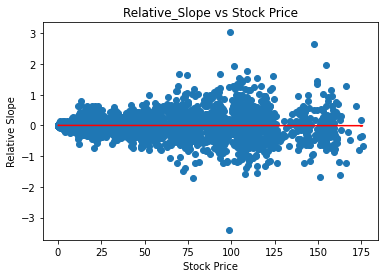

In [26]:
x = aapl['Close']
y = aapl['relative_slope']

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.title("Relative_Slope vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Relative Slope")

plt.plot(x, m*x + b, color='red')
print("y =" + str(m) + "*x" + "+" + str(b))

plt.show

#####**Correlation Between close/open_relative and Stock Close Price**

y =5.076727617753614e-09*x+0.0014346071148956664


<function matplotlib.pyplot.show>

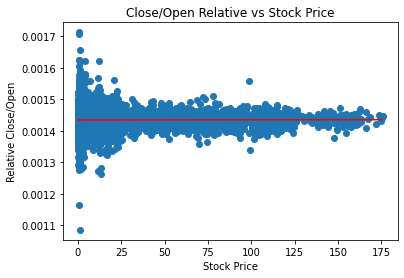

In [25]:
x = aapl['Close']
y = aapl['close/open_relative']
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.title("Close/Open Relative vs Stock Price")
plt.xlabel("Stock Price")
plt.ylabel("Relative Close/Open")

plt.plot(x, m*x + b, color='red')
print("y =" + str(m) + "*x" + "+" + str(b))

plt.show

#####**Correlation Between Relative_Slope and Stock Volume**

y =7.306724025967188e-11*x+-0.006357289253411597


<function matplotlib.pyplot.show>

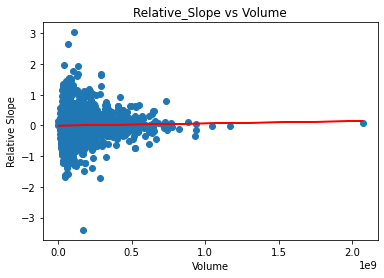

In [30]:
x = aapl['Volume']
y = aapl['relative_slope']
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.title("Relative_Slope vs Volume")
plt.xlabel("Volume")
plt.ylabel("Relative Slope")

plt.plot(x, m*x + b, color='red')
print("y =" + str(m) + "*x" + "+" + str(b))

plt.show

#####**Correlation Between Close/Open_Relative and Stock Volume**

y =3.3841306959309528e-15*x+0.0014343593403471522


<function matplotlib.pyplot.show>

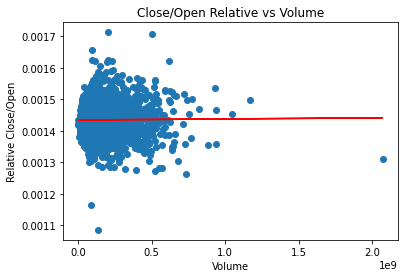

In [29]:
x = aapl['Volume']
y = aapl['close/open_relative']
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.title("Close/Open Relative vs Volume")
plt.xlabel("Volume")
plt.ylabel("Relative Close/Open")

plt.plot(x, m*x + b, color='red')
print("y =" + str(m) + "*x" + "+" + str(b))

plt.show

# **Heritability in Stock Prices**



## **Experiment 1: Overall Heritability**



y =0.9999300868971756*x+-0.0017741565180051148
heritability(h^2) = 1


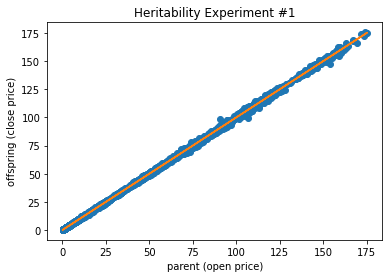

In [ ]:
x = np.array(aapl['Open'])
y = np.array(aapl['Close'])
plt.plot(x,y,'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Heritability Experiment #1")
plt.xlabel("parent (open price)")
plt.ylabel("offspring (close price)")

plt.show
print("y =" + str(m) + "*x" + "+" + str(b))
print("heritability(h^2) = 1")

## **Experiment 2: Heritability By Year**

In [ ]:
aapl_1984 = aapl[:80]
aapl_1985 = aapl[80:333]
aapl_2000 = aapl[3871:4123]
aapl_2016 = aapl[7894:8146]
aapl_2000.tail()

,Date,Open,High,Low,Close,Volume,OpenInt,individual_fitness,population_fitness,relative_fitness
4118,2000-12-22,0.9039,0.9604,0.9039,0.9604,88699310,0,0.0565,-0.003332,-16.956149
4119,2000-12-26,0.9526,0.9604,0.9117,0.9399,60466088,0,-0.0127,-0.003332,3.811382
4120,2000-12-27,0.9184,0.9490,0.9078,0.9490,90767052,0,0.0306,-0.003332,-9.183330
4121,2000-12-28,0.9209,0.9565,0.9171,0.9490,85108857,0,0.0281,-0.003332,-8.433058
4122,2000-12-29,0.9399,0.9604,0.9284,0.9526,175790027,0,0.0127,-0.003332,-3.811382


y = 1.013116809214537*x + -0.008972671148518645
y = 1.0028822555941734*x + -0.013527106847332538
Heritability (h^2):
1984: 1.01
2000: 1.00


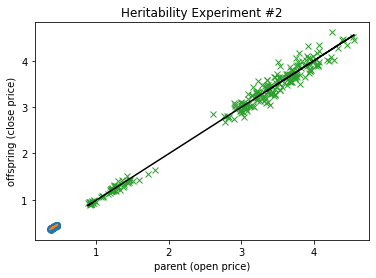

In [ ]:
x_1984 = np.array(aapl_1984['Open'])
y_1984 = np.array(aapl_1984['Close'])
plt.plot(x_1984,y_1984,'o')
m_1984,b_1984 = np.polyfit(x_1984, y_1984, 1)
plt.plot(x_1984, m_1984*x_1984 + b_1984)
"""
x_1985 = np.array(aapl_1985['Open'])
y_1985 = np.array(aapl_1985['Close'])
plt.plot(x_1985,y_1985,'x')
m_1985,b_1985 = np.polyfit(x_1985, y_1985, 1)
plt.plot(x_1985, m_1985*x_1985 + b_1985, color='brown')
"""
x_2000 = np.array(aapl_2000['Open'])
y_2000 = np.array(aapl_2000['Close'])
plt.plot(x_2000,y_2000,'x')
m_2000,b_2000 = np.polyfit(x_2000, y_2000, 1)
plt.plot(x_2000, m_2000*x_2000 + b_2000, color='black')

plt.title("Heritability Experiment #2")
plt.xlabel("parent (open price)")
plt.ylabel("offspring (close price)")

plt.show
print("y = " + str(m_1984) + "*x" + " + " + str(b_1984))
#print("y = " + str(m_1985) + "*x" + " + " + str(b_1985))
print("y = " + str(m_2000) + "*x" + " + " + str(b_2000))
print("Heritability (h^2):")
print("1984: " + str(m_1984)[:4])
#print("1985: " + str(m_1985)[:4])
print("2000: " + str(m_2000)[:4])

Heritability is a good indicator on whether a stock is doing good (increasing in price over time) or not. 
In this case, AAPL has generally had h^2 = 1 roughly.
If a stock is going downhill and will probably go down in price in the future, the heritability value would decrease.

## **Experiment 3: Overall Heritability of a Bad Stock**


In [31]:
print(fslr.shape)
fslr.head()

(2765, 7)


,Date,Open,High,Low,Close,Volume,OpenInt
0,2006-11-16,20.00,20.00,20.00,20.00,0,0
1,2006-11-17,24.50,25.18,23.50,24.74,18359706,0
2,2006-11-20,24.69,25.67,24.29,25.00,1688963,0
3,2006-11-21,25.00,25.19,24.31,24.60,1179813,0
4,2006-11-22,24.57,26.88,24.50,26.88,1260752,0


y =0.9953966523113154*x+0.30143386876527234
heritability(h^2) = 1


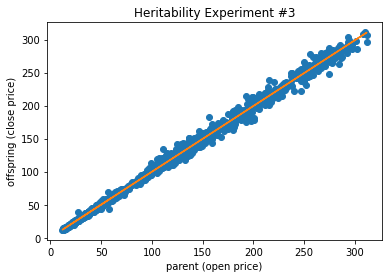

In [ ]:
x = np.array(fslr['Open'])
y = np.array(fslr['Close'])
plt.plot(x,y,'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Heritability Experiment #3")
plt.xlabel("parent (open price)")
plt.ylabel("offspring (close price)")

plt.show
print("y =" + str(m) + "*x" + "+" + str(b))
print("heritability(h^2) = 1")

In [ ]:
ino = pd.read_csv('ino.us.txt')
print(ino.shape)
ino

(3201, 7)


,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,17.80,17.8400,17.12,17.320,20675,0
1,2005-02-28,17.40,17.4000,16.88,17.000,8825,0
2,2005-03-01,17.40,17.7600,17.12,17.640,8600,0
3,2005-03-02,17.60,17.8000,17.48,17.800,9975,0
4,2005-03-03,17.96,18.8000,17.84,18.720,60775,0
...,...,...,...,...,...,...,...
3196,2017-11-06,5.76,5.8000,5.66,5.660,637762,0
3197,2017-11-07,5.64,5.6600,5.30,5.315,1405926,0
3198,2017-11-08,5.37,5.4063,5.22,5.330,988130,0
3199,2017-11-09,5.00,5.1000,4.40,4.430,3799512,0


y =0.9932195261404955*x+0.008829188169369784
heritability(h^2) = 1


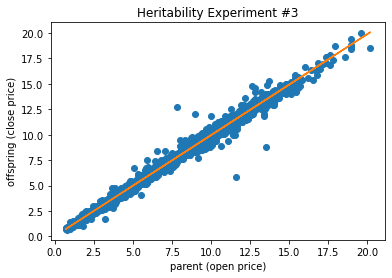

In [ ]:
x = np.array(ino['Open'])
y = np.array(ino['Close'])
plt.plot(x,y,'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Heritability Experiment #3")
plt.xlabel("parent (open price)")
plt.ylabel("offspring (close price)")

plt.show
print("y =" + str(m) + "*x" + "+" + str(b))
print("heritability(h^2) = 1")

Note to self: Heritability is bad characteristic for predicting stock prices. Tomorrow, try to somehow figure out how to implement 'S' directional selection. Research more about Volume trading first.

In [34]:
print(ba.shape)
ba.head()

(12074, 7)


,Date,Open,High,Low,Close,Volume,OpenInt
0,1970-01-02,0.7587,0.8092,0.7587,0.8092,753088,0
1,1970-01-05,0.8263,0.8429,0.8263,0.8345,879203,0
2,1970-01-06,0.8429,0.8598,0.8429,0.8429,1607067,0
3,1970-01-07,0.8429,0.8598,0.8429,0.8512,767501,0
4,1970-01-08,0.8512,0.8512,0.8263,0.8429,958476,0


y =1.0004900431519421*x+-0.006258493500233103
heritability(h^2) = 1


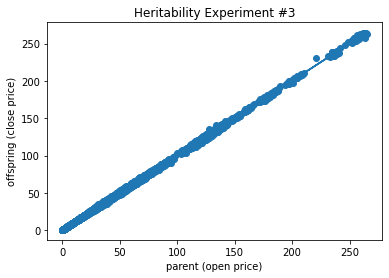

In [35]:
x = ba['Open']
y = ba['Close']
plt.scatter(x,y)
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Heritability Experiment #3")
plt.xlabel("parent (open price)")
plt.ylabel("offspring (close price)")

plt.show
print("y =" + str(m) + "*x" + "+" + str(b))
print("heritability(h^2) = 1")

# **Miscellaneous**


y =-248831.1933160804*x+112186669.82661529


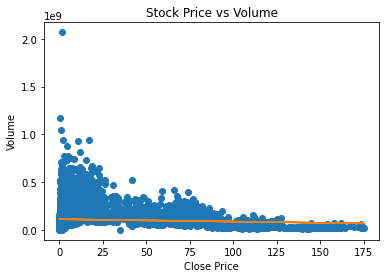

In [ ]:
#Correlation between stock price and Volume
x = np.array(aapl['Open'])
y = np.array(aapl['Volume'])
plt.plot(x,y,'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Stock Price vs Volume")
plt.xlabel("Close Price")
plt.ylabel("Volume")

plt.show
print("y =" + str(m) + "*x" + "+" + str(b))

In [ ]:
volume_sum = aapl['Volume'].sum(axis=0)
volume_avg = volume_sum / 8364
aapl['volume_avg'] = volume_avg
aapl['relative_volume'] = aapl['Volume'] / aapl['volume_avg']
aapl.head()

,Date,Open,High,Low,Close,Volume,OpenInt,individual_fitness,population_fitness,relative_fitness,volume_avg,relative_volume
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,0.00000,-0.003332,-0.000000,1.066416e+08,0.217739
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,-0.00254,-0.003332,0.762276,1.066416e+08,0.169001
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,0.00386,-0.003332,-1.158420,1.066416e+08,0.398514
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,-0.01284,-0.003332,3.853397,1.066416e+08,0.348136
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,0.00000,-0.003332,-0.000000,1.066416e+08,0.542209


y =-0.002344222049206207*x+1.0522316537382637


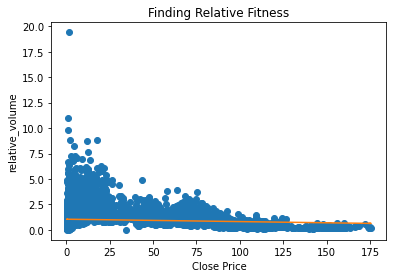

In [ ]:
x = np.array(aapl['Close'])
y = np.array(aapl['relative_volume'])
plt.plot(x,y,'o')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.title("Finding Relative Fitness")
plt.xlabel("Close Price")
plt.ylabel("relative_volume")

plt.show
print("y =" + str(m) + "*x" + "+" + str(b))

In [ ]:
#Method 1:
#aapl['success_rate'] = aapl['individual_fitness'] >= 0
#aapl['success_rate'] = aapl['success_rate'].apply(lambda x: 1 if x==True else 0)

#Method 2:
#aapl['success_rate'] = aapl['individual_fitness'] >= 0
#success_map = {True: 1, False: 0}
#aapl['success_rate'] = aapl['success_rate'].map(success_map)


In [ ]:
aapl['success_rate'] = aapl['individual_fitness'] >= 0
aapl['success_rate'] = aapl['success_rate'].apply(lambda x: 1 if x==True else 0)
aapl = aapl.drop(['success_rate2'], axis=1)
aapl.head()

In [ ]:
aapl.describe()
aapl['population_success'] = aapl['success_rate'].mean()
aapl['relative_success'] = aapl['success_rate'] / aapl['population_success']
aapl.head()

,Date,Open,High,Low,Close,Volume,OpenInt,individual_fitness,population_fitness,relative_fitness,volume_avg,relative_volume,success_rate,population_success,relative_success
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,0.00000,-0.003332,-0.000000,1.066416e+08,0.217739,1,0.522477,1.913959
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,-0.00254,-0.003332,0.762276,1.066416e+08,0.169001,0,0.522477,0.000000
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,0.00386,-0.003332,-1.158420,1.066416e+08,0.398514,1,0.522477,1.913959
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,-0.01284,-0.003332,3.853397,1.066416e+08,0.348136,0,0.522477,0.000000
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,0.00000,-0.003332,-0.000000,1.066416e+08,0.542209,1,0.522477,1.913959


<function matplotlib.pyplot.show>

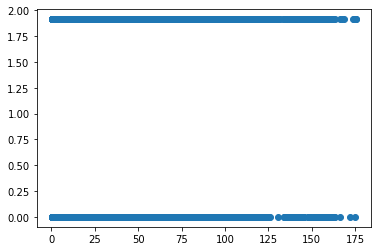

In [ ]:
x = aapl['Close']
y = aapl['relative_success']

plt.scatter(x,y)
plt.show

In [ ]:
aapl.head()
aapl['Close/Open'] = 

,Date,Open,High,Low,Close,Volume,OpenInt,individual_fitness,population_fitness,relative_fitness,volume_avg,relative_volume,success_rate,population_success,relative_success
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,0.00000,-0.003332,-0.000000,1.066416e+08,0.217739,1,0.522477,1.913959
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,-0.00254,-0.003332,0.762276,1.066416e+08,0.169001,0,0.522477,0.000000
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,0.00386,-0.003332,-1.158420,1.066416e+08,0.398514,1,0.522477,1.913959
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,-0.01284,-0.003332,3.853397,1.066416e+08,0.348136,0,0.522477,0.000000
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,0.00000,-0.003332,-0.000000,1.066416e+08,0.542209,1,0.522477,1.913959


#**Conclusion:**
##Could not find a way to apply the Breeder's Equation to Stock Market Data. There just isn't much data or characteristics of data to come up with a meaningful **trait** or meaningful **relative fitness**.
##Next I will try to see if the Breeder's Equation can be applied to Housing Market Data, and see if the Evolution of Housing Prices can be predicted.